In [2]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 12.2 MB/s eta 0:00:00


In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import arch
from sklearn.preprocessing import StandardScaler


# **Obtain data**

In [4]:
def get_asset_history(asset, start_date, end_date, interval):
  ticker = yf.Ticker(asset)
  history = ticker.history(start = start_date, end = end_date, interval = interval)
  return history

In [5]:
cryptos = ["BTC-USD", "ETH-USD", "BNB-USD", "XRP-USD", "DOGE-USD"]

start_date = "2023-11-01"
end_date = "2024-11-01"


In [6]:
data = {}
for crypto in cryptos:
    data[crypto] = get_asset_history(crypto, start_date, end_date, "1d")


In [7]:
for _, df in data.items():
  df["return"] = df.Close.pct_change() * 100

# **Plot the charts**

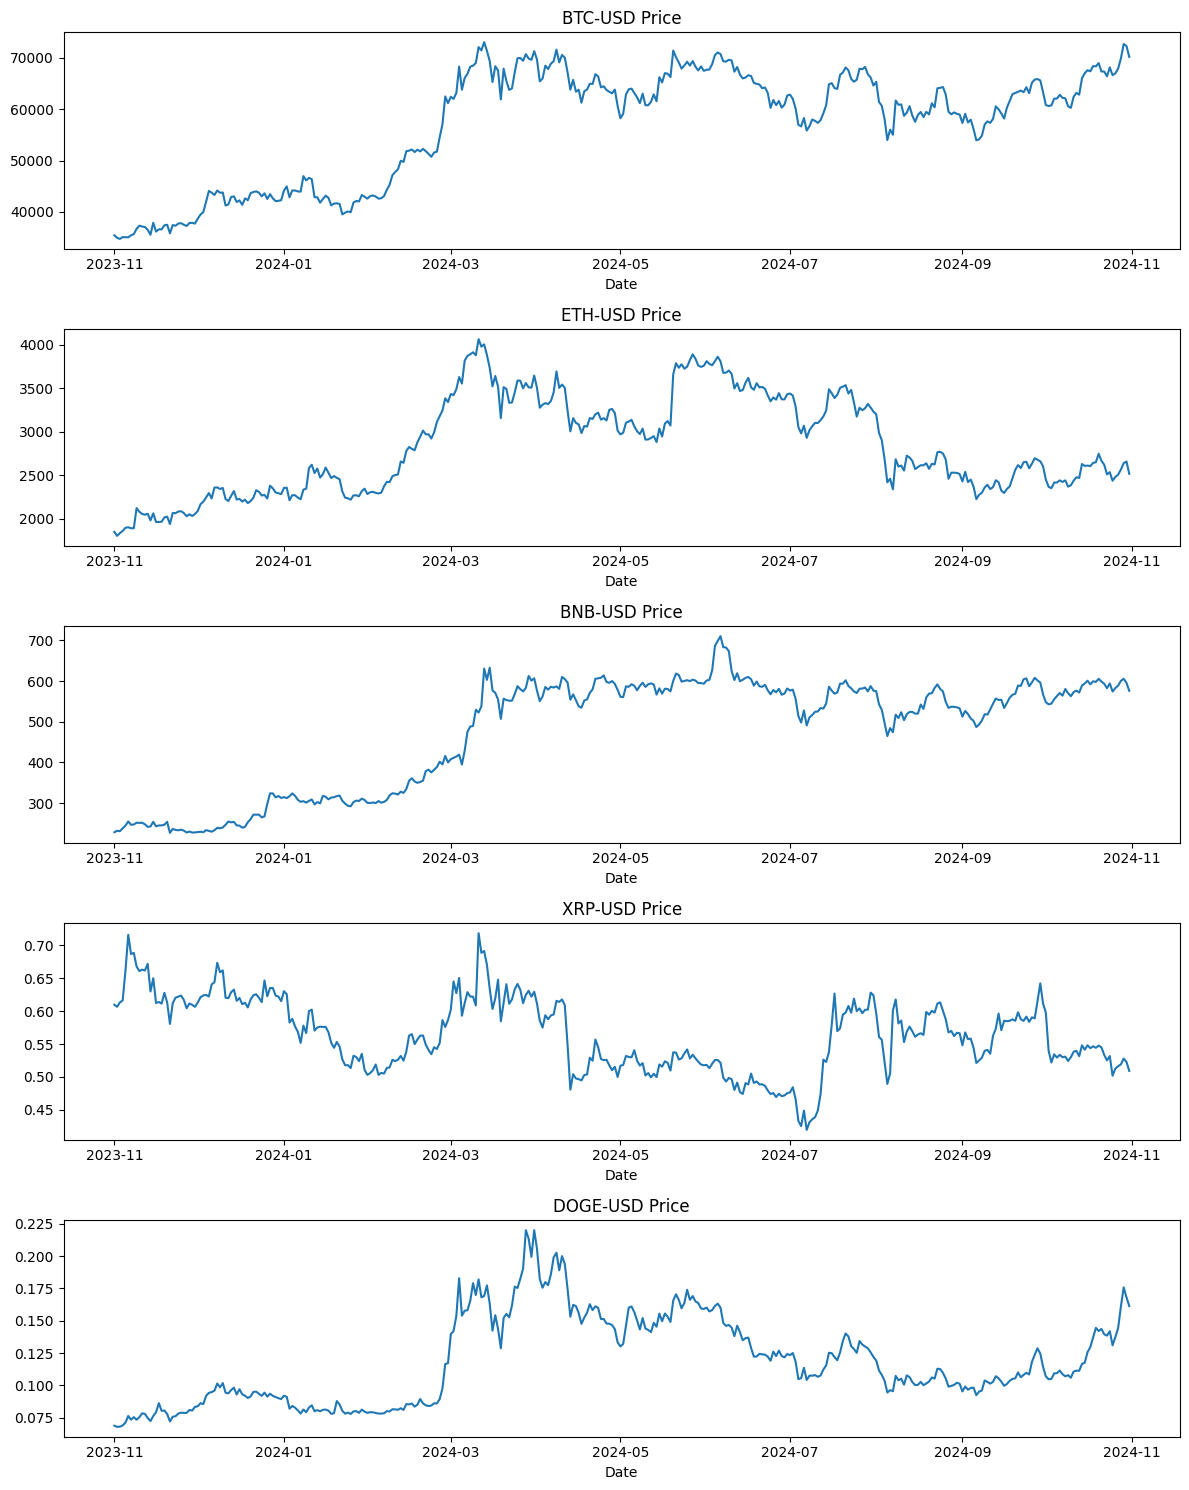

In [8]:
fig, axes = plt.subplots(len(cryptos), 1, figsize=(12, 3 * len(cryptos)))

for i, crypto in enumerate(cryptos):
    axes[i].plot(data[crypto]['Close'])
    axes[i].set_title(f'{crypto} Price')
    axes[i].set_xlabel('Date')

plt.tight_layout()
plt.show()

In [9]:
def get_garch_volatility(df, p, q):
    scaler = StandardScaler()
    scaled_y = scaler.fit_transform(df['return'].dropna().values.reshape(-1, 1)).flatten()

    garch_model = arch.arch_model(scaled_y, vol = "garch", p = p, q = q)
    garch_fit = garch_model.fit(disp='off')
    garch_volatility_forecast = garch_fit.conditional_volatility

    return garch_volatility_forecast

In [10]:
def get_arch_volatility(df, p, q):
    scaler = StandardScaler()
    scaled_y = scaler.fit_transform(df['return'].dropna().values.reshape(-1, 1)).flatten()

    arch_model = arch.arch_model(scaled_y, vol = 'arch', p = p, q = q)
    arch_fit = arch_model.fit(disp = 'off')
    arch_volatility_forecast = arch_fit.conditional_volatility

    return arch_volatility_forecast

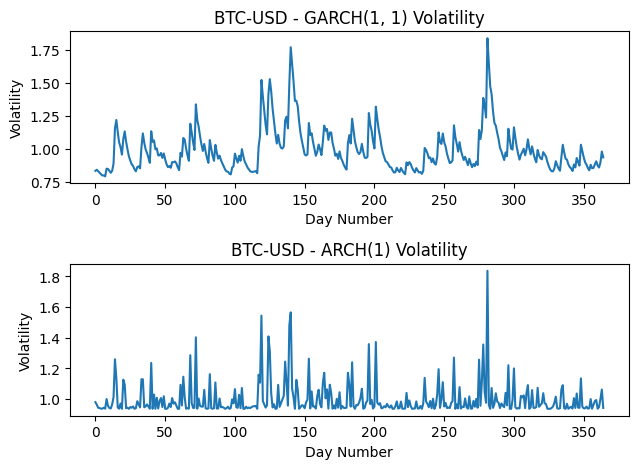


Symbol: BTC-USD

GARCH Mean Volatility (Uptrend): 0.9979238620702023
	Max: 1.6460468837242246
	Min: 0.792464586635499

GARCH Mean Volatility (Downtrend): 0.9890394508752113
	Max: 1.8381313262466927
	Min: 0.8083401271715782

ARCH Mean Volatility (Uptrend): 0.9931374621788585
	Max: 1.4788652081992735
	Min: 0.9335167004107484

ARCH Mean Volatility (Downtrend): 0.9967906023861871
	Max: 1.8372977190362034
	Min: 0.933517354540944




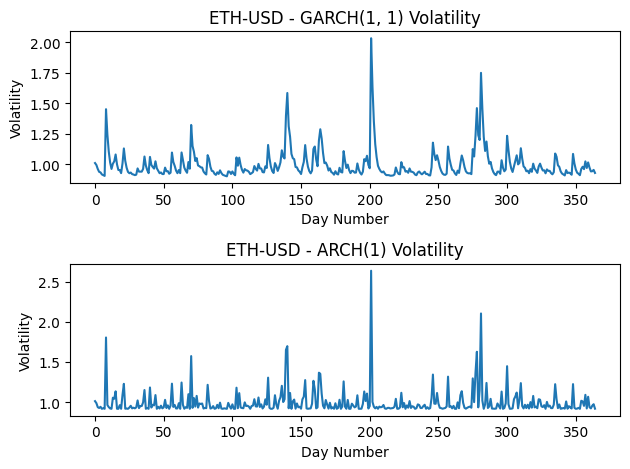


Symbol: ETH-USD

GARCH Mean Volatility (Uptrend): 0.9927989821727923
	Max: 2.0321860471459017
	Min: 0.9018192652225114

GARCH Mean Volatility (Downtrend): 1.002590928033304
	Max: 1.7488622445802569
	Min: 0.9088422805008582

ARCH Mean Volatility (Uptrend): 0.9976031966613892
	Max: 2.6337971599002277
	Min: 0.9183096023783484

ARCH Mean Volatility (Downtrend): 0.9988695817469518
	Max: 2.1029775250766094
	Min: 0.918307264051812




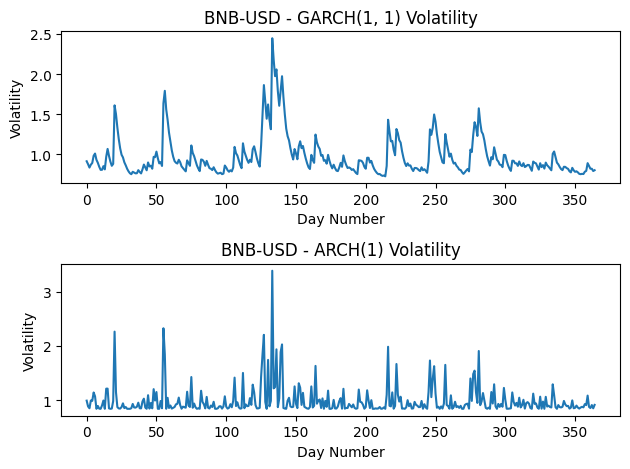


Symbol: BNB-USD

GARCH Mean Volatility (Uptrend): 0.966027949446731
	Max: 2.1799435792945756
	Min: 0.7265981161263518

GARCH Mean Volatility (Downtrend): 0.9794505205698043
	Max: 2.4455662500471282
	Min: 0.7409017271037651

ARCH Mean Volatility (Uptrend): 0.9780471228535726
	Max: 2.3266033525992964
	Min: 0.8423259308731559

ARCH Mean Volatility (Downtrend): 1.0031116055641136
	Max: 3.38657384831935
	Min: 0.8424402269791916




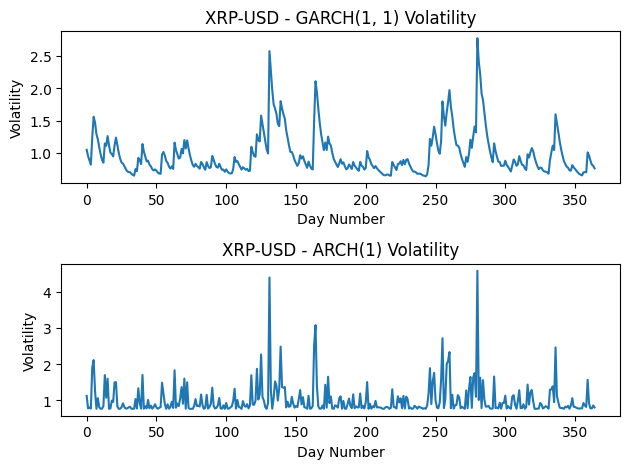


Symbol: XRP-USD

GARCH Mean Volatility (Uptrend): 0.9892810855137614
	Max: 2.7723075864191156
	Min: 0.6393043573819879

GARCH Mean Volatility (Downtrend): 0.96831766204926
	Max: 2.5725521286970303
	Min: 0.6486680997067916

ARCH Mean Volatility (Uptrend): 1.0021664260918821
	Max: 4.581611080901914
	Min: 0.7628806025843192

ARCH Mean Volatility (Downtrend): 1.0130653336162427
	Max: 4.393077642627814
	Min: 0.7628378788483121




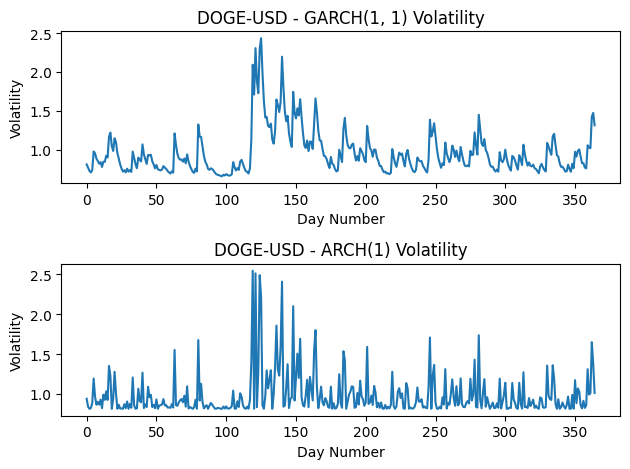


Symbol: DOGE-USD

GARCH Mean Volatility (Uptrend): 0.9729075529577959
	Max: 2.434199209160438
	Min: 0.6572337902839733

GARCH Mean Volatility (Downtrend): 0.9447802872646826
	Max: 2.3008328095735666
	Min: 0.6687502249549548

ARCH Mean Volatility (Uptrend): 0.9908062271991099
	Max: 2.546827656298503
	Min: 0.8139497502087736

ARCH Mean Volatility (Downtrend): 0.9723469797449683
	Max: 2.4912130583221708
	Min: 0.8139737425959801



In [11]:
for symbol, df in data.items():

    p = 1
    q = 1

    garch_volatility_forecast = get_garch_volatility(df, p, q)
    arch_volatility_forecast = get_arch_volatility(df, p, q)

    up_garch_volatility = garch_volatility_forecast[df['return'].iloc[1:].values > 0]
    down_garch_volatility = garch_volatility_forecast[df['return'].iloc[1:].values < 0]

    up_arch_volatility = arch_volatility_forecast[df['return'].iloc[1:].values > 0]
    down_arch_volatility = arch_volatility_forecast[df['return'].iloc[1:].values < 0]

    ##############################################

    up_garch_mean = up_garch_volatility.mean()
    down_garch_mean = down_garch_volatility.mean()

    up_garch_max = up_garch_volatility.max()
    down_garch_max = down_garch_volatility.max()

    up_garch_min = up_garch_volatility.min()
    down_garch_min = down_garch_volatility.min()

    ##############################################

    up_arch_mean = up_arch_volatility.mean()
    down_arch_mean = down_arch_volatility.mean()

    up_arch_max = up_arch_volatility.max()
    down_arch_max = down_arch_volatility.max()

    up_arch_min = up_arch_volatility.min()
    down_arch_min = down_arch_volatility.min()

    ##############################################

    print("==========================================================================================\n")

    fig, axes = plt.subplots(2, 1)
    axes[0].plot(garch_volatility_forecast, label=f'{symbol} GARCH({p}, {q}) Volatility')
    axes[0].set_title(f'{symbol} - GARCH({p}, {q}) Volatility')
    axes[0].set_xlabel('Day Number')
    axes[0].set_ylabel('Volatility')

    axes[1].plot(arch_volatility_forecast, label=f'{symbol} ARCH({p}) Volatility')
    axes[1].set_title(f'{symbol} - ARCH({p}) Volatility')
    axes[1].set_xlabel('Day Number')
    axes[1].set_ylabel('Volatility')

    plt.tight_layout()
    plt.show()

    print(f"\nSymbol: {symbol}\n")
    print(f"GARCH Mean Volatility (Uptrend): {up_garch_mean}\n\tMax: {up_garch_max}\n\tMin: {up_garch_min}\n")
    print(f"GARCH Mean Volatility (Downtrend): {down_garch_mean}\n\tMax: {down_garch_max}\n\tMin: {down_garch_min}\n")
    print(f"ARCH Mean Volatility (Uptrend): {up_arch_mean}\n\tMax: {up_arch_max}\n\tMin: {up_arch_min}\n")
    print(f"ARCH Mean Volatility (Downtrend): {down_arch_mean}\n\tMax: {down_arch_max}\n\tMin: {down_arch_min}")
    print("==========================================================================================\n")